In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
torch.set_default_device('cpu')

import numpy as np

from transformers_simple.transformer import GPT
from transformers_simple.train import Trainer
from transformers_simple.dataset import CharDataset

In [2]:
N = 4
block_size  = 2
embed_size  = 6
hidden_size = 30
attn_hidden_size = 30
output_size = 3
num_heads   = 3
vocab_size  = 3
num_transformer_blocks = 2

log_interval = 10
epochs = 5
learning_rate = 1e-4
device = torch.device('cpu')

In [3]:
# #block size 1
# data = "".join(["abca"]*1000)

In [4]:
# block size 2
data = "".join(["aabcacb"]*1000)

In [5]:
dataset = CharDataset(data=data, block_size=block_size)
dataset[0]

(tensor([0, 0]), tensor([0, 1]))

In [6]:
net = GPT(vocab_size=vocab_size, 
          block_size=block_size,
          embed_size=embed_size,
          hidden_size=hidden_size,
          attn_hidden_size=attn_hidden_size,
          output_size=output_size,
          num_transformer_blocks=num_transformer_blocks,
          num_heads=num_heads)

In [7]:
x = dataset[0][0].view(1,-1)

In [8]:
x

tensor([[0, 0]])

In [9]:
loss = torch.nn.CrossEntropyLoss()

def loss_fn(o,y):
    return loss(o.view(-1,vocab_size),y.view(-1))

In [10]:
trainer = Trainer(model=net, 
                  dataset=dataset, 
                  loss_fn=loss_fn, 
                  batch_size=N, 
                  learning_rate=learning_rate,
                  epochs=epochs, 
                  log_interval=log_interval, 
                  device=device)

In [11]:
trainer.run()

Train Epoch: 0 [0/6998 (0%)]	Loss: 1.116628
Train Epoch: 0 [40/6998 (1%)]	Loss: 1.020494
Train Epoch: 0 [80/6998 (1%)]	Loss: 1.178215
Train Epoch: 0 [120/6998 (2%)]	Loss: 1.109721
Train Epoch: 0 [160/6998 (2%)]	Loss: 1.044535
Train Epoch: 0 [200/6998 (3%)]	Loss: 1.041752
Train Epoch: 0 [240/6998 (3%)]	Loss: 1.043885
Train Epoch: 0 [280/6998 (4%)]	Loss: 1.140633
Train Epoch: 0 [320/6998 (5%)]	Loss: 1.063681
Train Epoch: 0 [360/6998 (5%)]	Loss: 1.250222
Train Epoch: 0 [400/6998 (6%)]	Loss: 1.117272
Train Epoch: 0 [440/6998 (6%)]	Loss: 1.122170
Train Epoch: 0 [480/6998 (7%)]	Loss: 1.071926
Train Epoch: 0 [520/6998 (7%)]	Loss: 1.090929
Train Epoch: 0 [560/6998 (8%)]	Loss: 1.124705
Train Epoch: 0 [600/6998 (9%)]	Loss: 1.036720
Train Epoch: 0 [640/6998 (9%)]	Loss: 1.113894
Train Epoch: 0 [680/6998 (10%)]	Loss: 1.137796
Train Epoch: 0 [720/6998 (10%)]	Loss: 1.018885
Train Epoch: 0 [760/6998 (11%)]	Loss: 1.160928
Train Epoch: 0 [800/6998 (11%)]	Loss: 1.115282
Train Epoch: 0 [840/6998 (12%)]	Lo

Train Epoch: 1 [0/6998 (0%)]	Loss: 0.977066
Train Epoch: 1 [40/6998 (1%)]	Loss: 0.936538
Train Epoch: 1 [80/6998 (1%)]	Loss: 0.928438
Train Epoch: 1 [120/6998 (2%)]	Loss: 0.889147
Train Epoch: 1 [160/6998 (2%)]	Loss: 1.056065
Train Epoch: 1 [200/6998 (3%)]	Loss: 0.993562
Train Epoch: 1 [240/6998 (3%)]	Loss: 0.896948
Train Epoch: 1 [280/6998 (4%)]	Loss: 0.996923
Train Epoch: 1 [320/6998 (5%)]	Loss: 0.964744
Train Epoch: 1 [360/6998 (5%)]	Loss: 0.962477
Train Epoch: 1 [400/6998 (6%)]	Loss: 0.846653
Train Epoch: 1 [440/6998 (6%)]	Loss: 0.971918
Train Epoch: 1 [480/6998 (7%)]	Loss: 1.008129
Train Epoch: 1 [520/6998 (7%)]	Loss: 1.041232
Train Epoch: 1 [560/6998 (8%)]	Loss: 1.011027
Train Epoch: 1 [600/6998 (9%)]	Loss: 0.922524
Train Epoch: 1 [640/6998 (9%)]	Loss: 0.917934
Train Epoch: 1 [680/6998 (10%)]	Loss: 0.983235
Train Epoch: 1 [720/6998 (10%)]	Loss: 1.169268
Train Epoch: 1 [760/6998 (11%)]	Loss: 1.045597
Train Epoch: 1 [800/6998 (11%)]	Loss: 1.014011
Train Epoch: 1 [840/6998 (12%)]	Lo

Train Epoch: 1 [6880/6998 (98%)]	Loss: 0.809457
Train Epoch: 1 [6920/6998 (99%)]	Loss: 0.968394
Train Epoch: 1 [6960/6998 (99%)]	Loss: 0.963704
Train Epoch: 2 [0/6998 (0%)]	Loss: 0.825477
Train Epoch: 2 [40/6998 (1%)]	Loss: 0.995426
Train Epoch: 2 [80/6998 (1%)]	Loss: 0.990655
Train Epoch: 2 [120/6998 (2%)]	Loss: 0.927162
Train Epoch: 2 [160/6998 (2%)]	Loss: 0.798866
Train Epoch: 2 [200/6998 (3%)]	Loss: 0.830294
Train Epoch: 2 [240/6998 (3%)]	Loss: 0.753814
Train Epoch: 2 [280/6998 (4%)]	Loss: 1.017680
Train Epoch: 2 [320/6998 (5%)]	Loss: 0.965300
Train Epoch: 2 [360/6998 (5%)]	Loss: 1.152821
Train Epoch: 2 [400/6998 (6%)]	Loss: 0.880514
Train Epoch: 2 [440/6998 (6%)]	Loss: 1.038276
Train Epoch: 2 [480/6998 (7%)]	Loss: 0.828863
Train Epoch: 2 [520/6998 (7%)]	Loss: 0.955320
Train Epoch: 2 [560/6998 (8%)]	Loss: 0.917888
Train Epoch: 2 [600/6998 (9%)]	Loss: 1.055029
Train Epoch: 2 [640/6998 (9%)]	Loss: 0.819585
Train Epoch: 2 [680/6998 (10%)]	Loss: 0.981492
Train Epoch: 2 [720/6998 (10%)]

Train Epoch: 2 [6800/6998 (97%)]	Loss: 0.793103
Train Epoch: 2 [6840/6998 (98%)]	Loss: 0.880751
Train Epoch: 2 [6880/6998 (98%)]	Loss: 1.026931
Train Epoch: 2 [6920/6998 (99%)]	Loss: 0.895178
Train Epoch: 2 [6960/6998 (99%)]	Loss: 0.797950
Train Epoch: 3 [0/6998 (0%)]	Loss: 0.698178
Train Epoch: 3 [40/6998 (1%)]	Loss: 0.818878
Train Epoch: 3 [80/6998 (1%)]	Loss: 0.688760
Train Epoch: 3 [120/6998 (2%)]	Loss: 0.716341
Train Epoch: 3 [160/6998 (2%)]	Loss: 0.851956
Train Epoch: 3 [200/6998 (3%)]	Loss: 0.784801
Train Epoch: 3 [240/6998 (3%)]	Loss: 0.875630
Train Epoch: 3 [280/6998 (4%)]	Loss: 0.698117
Train Epoch: 3 [320/6998 (5%)]	Loss: 1.013229
Train Epoch: 3 [360/6998 (5%)]	Loss: 0.997766
Train Epoch: 3 [400/6998 (6%)]	Loss: 0.859287
Train Epoch: 3 [440/6998 (6%)]	Loss: 1.004297
Train Epoch: 3 [480/6998 (7%)]	Loss: 0.964744
Train Epoch: 3 [520/6998 (7%)]	Loss: 0.756844
Train Epoch: 3 [560/6998 (8%)]	Loss: 0.522687
Train Epoch: 3 [600/6998 (9%)]	Loss: 0.730590
Train Epoch: 3 [640/6998 (9%

Train Epoch: 3 [6680/6998 (95%)]	Loss: 0.761831
Train Epoch: 3 [6720/6998 (96%)]	Loss: 1.262580
Train Epoch: 3 [6760/6998 (97%)]	Loss: 0.486006
Train Epoch: 3 [6800/6998 (97%)]	Loss: 0.855746
Train Epoch: 3 [6840/6998 (98%)]	Loss: 0.984373
Train Epoch: 3 [6880/6998 (98%)]	Loss: 0.568419
Train Epoch: 3 [6920/6998 (99%)]	Loss: 1.008880
Train Epoch: 3 [6960/6998 (99%)]	Loss: 0.924484
Train Epoch: 4 [0/6998 (0%)]	Loss: 0.731617
Train Epoch: 4 [40/6998 (1%)]	Loss: 0.741729
Train Epoch: 4 [80/6998 (1%)]	Loss: 0.813374
Train Epoch: 4 [120/6998 (2%)]	Loss: 0.922466
Train Epoch: 4 [160/6998 (2%)]	Loss: 0.604601
Train Epoch: 4 [200/6998 (3%)]	Loss: 0.954866
Train Epoch: 4 [240/6998 (3%)]	Loss: 0.828927
Train Epoch: 4 [280/6998 (4%)]	Loss: 0.928349
Train Epoch: 4 [320/6998 (5%)]	Loss: 0.678488
Train Epoch: 4 [360/6998 (5%)]	Loss: 0.658806
Train Epoch: 4 [400/6998 (6%)]	Loss: 0.545035
Train Epoch: 4 [440/6998 (6%)]	Loss: 0.661603
Train Epoch: 4 [480/6998 (7%)]	Loss: 0.856690
Train Epoch: 4 [520/69

Train Epoch: 4 [6560/6998 (94%)]	Loss: 0.673327
Train Epoch: 4 [6600/6998 (94%)]	Loss: 0.765770
Train Epoch: 4 [6640/6998 (95%)]	Loss: 0.826925
Train Epoch: 4 [6680/6998 (95%)]	Loss: 0.787100
Train Epoch: 4 [6720/6998 (96%)]	Loss: 0.722000
Train Epoch: 4 [6760/6998 (97%)]	Loss: 0.974051
Train Epoch: 4 [6800/6998 (97%)]	Loss: 0.820716
Train Epoch: 4 [6840/6998 (98%)]	Loss: 0.597308
Train Epoch: 4 [6880/6998 (98%)]	Loss: 0.828982
Train Epoch: 4 [6920/6998 (99%)]	Loss: 1.214411
Train Epoch: 4 [6960/6998 (99%)]	Loss: 1.109295


In [12]:
x = dataset[0][0].view(1,-1)

o = net(x)

In [13]:
torch.nn.functional.softmax(o[0], dim=1)

tensor([[0.1562, 0.5826, 0.2612],
        [0.1562, 0.5826, 0.2612]], grad_fn=<SoftmaxBackward0>)

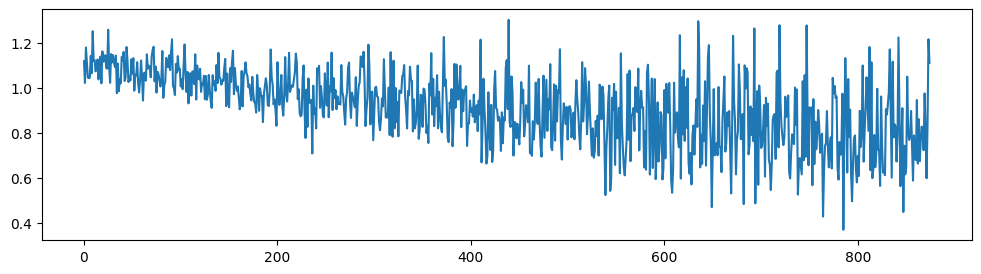

In [14]:
loss_history = trainer.loss_history

plt.figure(figsize=(12,3))
plt.plot(loss_history)
plt.show()

In [15]:
2

2